In [32]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Reading the dataset
df = pd.read_parquet('data/final_data/final_dataset.parquet')

# Replacing NaN values with 0
df = df.fillna(0)

In [34]:
df.head()



,date,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca,target
0,2010-02-14,0.0,36,13,20.52,136.0,3.619512,0.190574,0
1,2010-02-15,0.0,41,7,20.51,129.0,3.470118,0.209177,0
2,2010-02-16,0.0,43,8,20.51,130.0,3.433721,0.197542,0
3,2010-02-17,0.0,51,10,20.51,132.0,3.351107,0.135033,0
4,2010-02-18,0.0,51,16,20.50,135.0,3.238121,0.107690,0


In [37]:
# filter dataset for regression analysis

cols = ['date', 'max_temp', 'sm_pca']

df = df[cols]

In [38]:
# Lets look at the data

df.head()

,date,max_temp,sm_pca
0,2010-02-14,36,3.619512
1,2010-02-15,41,3.470118
2,2010-02-16,43,3.433721
3,2010-02-17,51,3.351107
4,2010-02-18,51,3.238121


<Axes: >

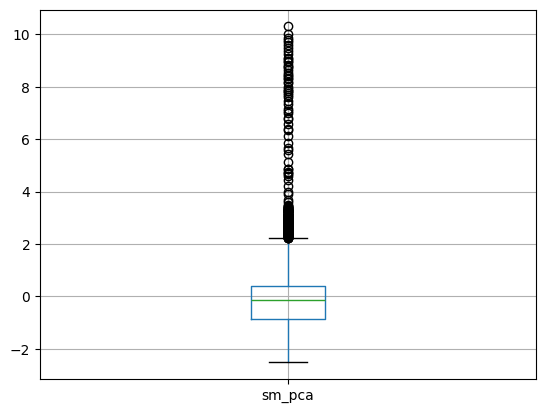

In [39]:
# generating boxplot for daily discharge to check for outliers

df.boxplot(column='sm_pca')

In [73]:
# count of outliers using IQR method

Q1 = df['sm_pca'].quantile(0.25)
Q3 = df['sm_pca'].quantile(0.75)
IQR = Q3 - Q1

# removing outliers
df = df[(df['sm_pca'] >= (Q1 - 1.5 * IQR)) & (df['sm_pca'] <= (Q3 + 1.5 * IQR))]

In [74]:
# Splitting data into training and test set using sklearn

X_train, X_test, y_train, y_test = train_test_split(df['max_temp'], df['sm_pca'], test_size=0.25, random_state=0)

In [75]:
# Looking at training data and test data

display(X_train.head())

display(y_train.head())

display(X_test.head())

display(y_test.head())

2757     49
2258     94
4430     85
947      72
2958    100
Name: max_temp, dtype: int64

2757    0.434079
2258   -0.215793
4430   -1.238244
947    -2.254666
2958   -0.463883
Name: sm_pca, dtype: float64

2627    98
3836    66
392     63
3331    91
3023    88
Name: max_temp, dtype: int64

2627    0.862678
3836    0.735168
392    -0.303155
3331   -1.507681
3023   -0.503004
Name: sm_pca, dtype: float64

In [78]:
# Reshaping the data
X_train = X_train.values.reshape(-1, 1)

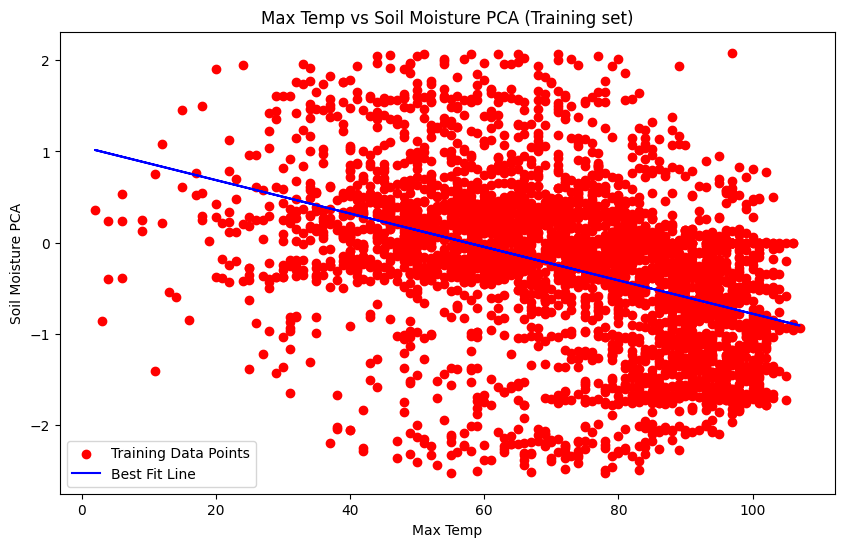

In [79]:
# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Visualizing the training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red')
# Plotting the best fit line
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Max Temp vs Soil Moisture PCA (Training set)')
plt.xlabel('Max Temp')
plt.ylabel('Soil Moisture PCA')
plt.legend(['Training Data Points', 'Best Fit Line'])
plt.show()

In [80]:
# Metric on training data
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error for Training data: {mse}')
print(f'R2 Score for Training data: {r2}')

# Metrics on test data
# Reshaping the test data
X_test = X_test.values.reshape(-1, 1)

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error for Test data: {mse}')
print(f'R2 Score for Test data: {r2}')

Mean Squared Error for Training data: 0.6893987955032931
R2 Score for Training data: 0.16350078148437164
Mean Squared Error for Test data: 0.7614535235766988
R2 Score for Test data: 0.1711733264821218
